Introduction:
The following project revolves around the development of a logistic regression model aimed at predicting the outcomes of direct marketing campaigns conducted by a Portuguese banking institution. These campaigns predominantly involved phone-based interactions with clients, often necessitating multiple contacts to determine their subscription interest in a bank term deposit. The dataset utilized, sourced from 'bank-additional-full.csv', encompasses 41,188 instances, each characterized by 20 input features and chronologically ordered from May 2008 to November 2010. This dataset closely mirrors the data examined in prior research by Moro et al. (2014), facilitating comparative analysis and validation of model performance.

Description:
The objective of this machine learning problem is to develop a robust logistic regression model capable of accurately predicting whether a client will subscribe ('yes') or not ('no') to a term deposit offered by the bank. The dataset consists of various features pertaining to the characteristics of clients, their interactions with the bank, and the outcomes of marketing efforts. These features serve as inputs for the model, enabling it to discern patterns and relationships conducive to predicting subscription outcomes.

Given the nature of the classification task, the development of an effective logistic regression model assumes paramount importance. Through meticulous analysis of the dataset and iterative model refinement, the aim is to achieve optimal predictive performance. Furthermore, the utilization of logistic regression facilitates interpretability, allowing for the identification of key factors influencing subscription decisions, thereby offering actionable insights for enhancing future marketing strategies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
ba1 = pd.read_csv("D:/anaconda/bank-additional-full.csv", sep=";")

In [3]:
ba1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA

In [4]:
print(f"Shape of the file {ba1.shape}")

Shape of the file (41199, 21)


In [5]:
ba1.isna().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [6]:
ba1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [7]:
ba1.describe(include = "all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41195.000000,41194,41194,41194,41195,41196,41195,41195,41196,41196,...,41196.000000,41196.000000,41196.000000,41194,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000,41196
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24934,12168,32595,21584,33957,26151,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36556
mean,40.030319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567676,962.482547,0.173124,NaN,0.081656,93.575867,-40.504600,3.620787,5166.996405,NaN
std,10.431818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.769751,186.893451,0.494987,NaN,1.570894,0.578999,4.629972,1.734655,72.300104,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [8]:
#checking for null value in the dataset
ba1.isna().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [9]:
print(f"Total number of null values in the dataset : {ba1.isna().sum().sum()}")

Total number of null values in the dataset : 76


In [10]:
print(ba1["y"].value_counts())

no     36556
yes     4640
Name: y, dtype: int64


In [11]:
#filling the null values with mode and median
col_list = list(ba1.columns)
for col in col_list:
    if ba1[col].dtype == "object":
        ba1[col] = ba1[col].fillna(ba1[col].mode()[0])
    else:
        ba1[col] = ba1[col].fillna(ba1[col].mean())

In [12]:
print(f"Total number of null value in the dataset : {ba1.isna().sum().sum()}")

Total number of null value in the dataset : 0


In [13]:
# Retrieves the list of column names from the DataFrame 'ba1' and assigns it to the variable 'col'.

col= list(ba1.columns)

In [14]:
#importing seaborn as sns
import seaborn as sns

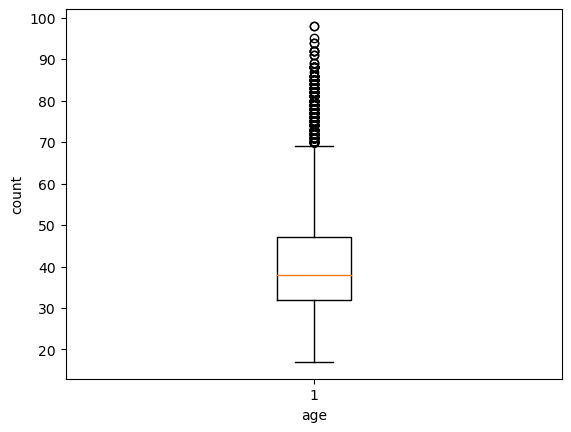

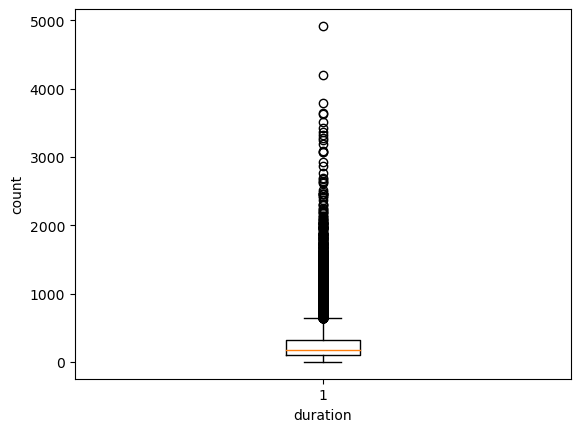

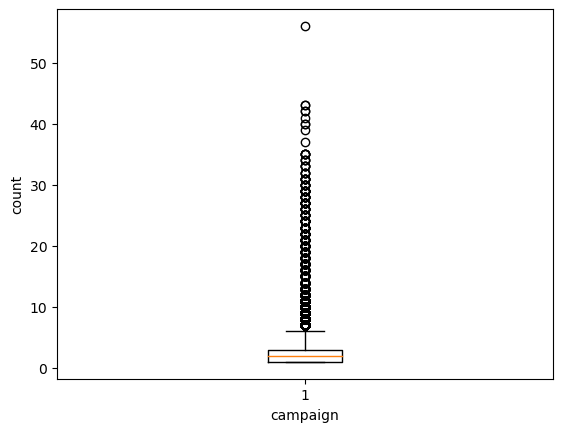

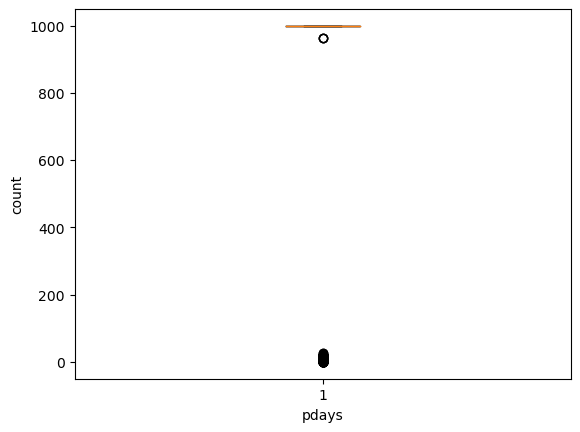

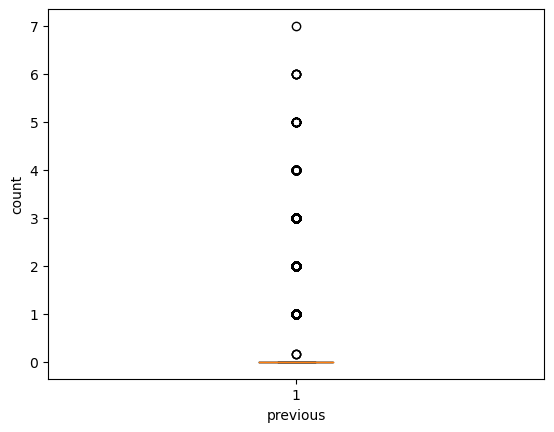

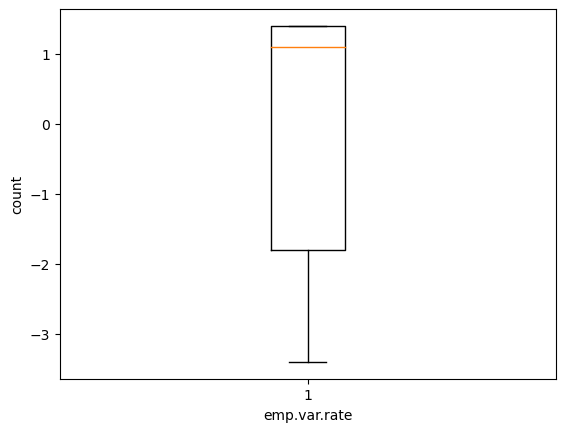

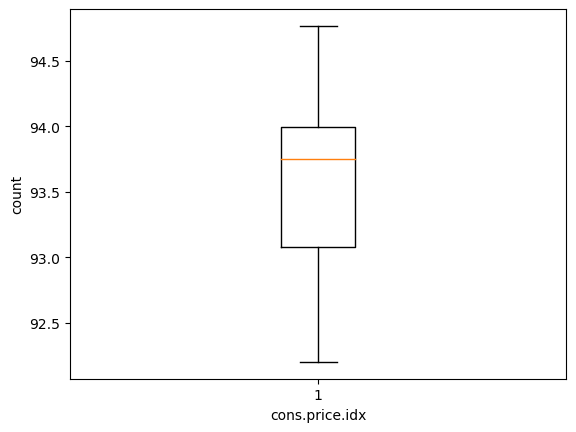

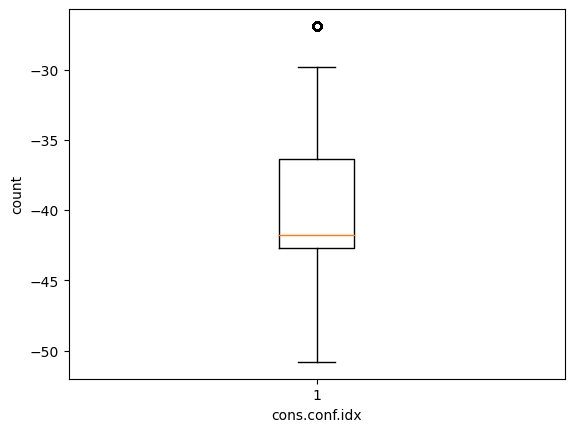

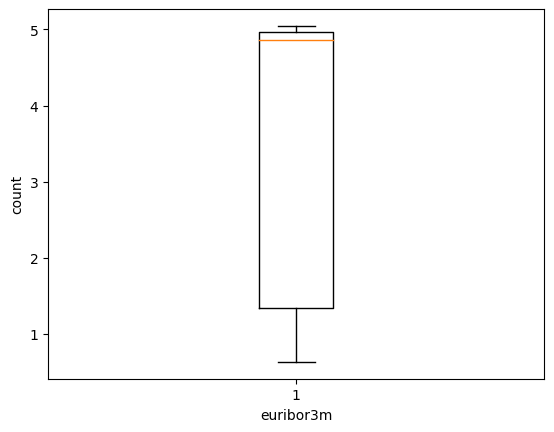

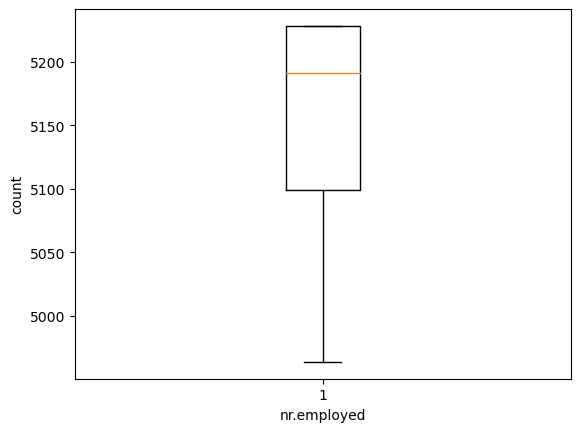

In [15]:
#Making the boxplot to have an insight on the Outlier in the dataset
for col_list in col:
    if ba1[col_list].dtype!="object":
        plt.boxplot(ba1[col_list])
        plt.xlabel(col_list)
        plt.ylabel("count")
        plt.show()

In [16]:
#removing outliers
q1 = ba1.quantile(0.25)
q3 = ba1.quantile(0.75)
iqr = q3-q1
print(iqr)
ba1= ba1[~((ba1 < (q1 - 1.5 * iqr)) |(ba1 > (q3 + 1.5 * iqr))).any(axis=1)]

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [17]:
print("shape of the original file: (41199, 21)")
print(f"Shape of the document are removing outliers {ba1.shape}") 

shape of the original file: (41199, 21)
Shape of the document are removing outliers (30360, 21)


In [18]:
print(f"print the column names {col}")

print the column names ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [19]:
col_list= list(ba1.columns)
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [20]:
col_list = []
for col in ba1.columns:
    if ((ba1[col].dtype == "object")):
        col_list.append(col)

In [21]:
print(f"Name of columns having object type data {col_list}")

Name of columns having object type data ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [22]:
#using label encoding to tranform the object type data to numerical data
from sklearn.preprocessing import LabelEncoder
labellencoder = LabelEncoder()
for i in col_list:
    ba1[i] = labellencoder.fit_transform(ba1[i])

In [23]:
#prinnting the top 5 rows to check the datset
ba1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0


# Variance inflation factor 
to remove multicollinearity from the dataset 

In [24]:
#VIF to calculate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in ba1.columns:
    if ((ba1[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = ba1[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,1.229086
1,job,1.025393
2,marital,1.182211
3,education,1.102071
4,default,1.112275
5,housing,1.013127
6,loan,1.003024
7,contact,2.718272
8,month,2.063068
9,day_of_week,1.011325


In [25]:
ba1 = ba1.drop(["poutcome","previous"], axis = 1)

In [26]:
#VIF to calculate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in ba1.columns:
    if ((ba1[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = ba1[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,1.229086
1,job,1.025393
2,marital,1.182211
3,education,1.102071
4,default,1.112275
5,housing,1.013127
6,loan,1.003024
7,contact,2.718272
8,month,2.063068
9,day_of_week,1.011325


In [27]:
ba1 = ba1.drop(["pdays"], axis = 1)

In [28]:
#VIF to calculate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in ba1.columns:
    if ((ba1[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = ba1[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,22.749800
1,job,2.095270
2,marital,5.610563
3,education,4.471501
4,default,1.436868
5,housing,2.192682
6,loan,1.208270
7,contact,3.588223
8,month,7.830533
9,day_of_week,3.107660


In [29]:
ba1 = ba1.drop(["nr.employed"], axis = 1)

In [30]:
#VIF to calculate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in ba1.columns:
    if ((ba1[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = ba1[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,22.749447
1,job,2.095230
2,marital,5.609584
3,education,4.471499
4,default,1.435616
5,housing,2.192065
6,loan,1.208170
7,contact,2.748061
8,month,6.764668
9,day_of_week,3.107058


In [31]:
ba1 = ba1.drop(["cons.price.idx"], axis = 1)

In [32]:
#VIF to calculate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in ba1.columns:
    if ((ba1[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = ba1[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,20.922223
1,job,2.087129
2,marital,5.377934
3,education,4.387092
4,default,1.435398
5,housing,2.187384
6,loan,1.207522
7,contact,2.513944
8,month,6.472615
9,day_of_week,3.082769


In [33]:
ba1 = ba1.drop(["euribor3m"], axis = 1)

In [34]:
#VIF to calculate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in ba1.columns:
    if ((ba1[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = ba1[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,17.603641
1,job,2.079159
2,marital,5.150678
3,education,4.199877
4,default,1.433830
5,housing,2.178631
6,loan,1.207295
7,contact,2.510035
8,month,5.781814
9,day_of_week,3.038628


In [35]:
ba1 = ba1.drop(["cons.conf.idx"], axis = 1)

In [36]:
#VIF to calculate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in ba1.columns:
    if ((ba1[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = ba1[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,9.689868
1,job,2.067445
2,marital,4.116292
3,education,4.049468
4,default,1.433827
5,housing,2.138872
6,loan,1.204034
7,contact,2.484177
8,month,5.320667
9,day_of_week,2.955953


In [37]:
ba1 = ba1.drop(["age"], axis = 1)

In [38]:
#VIF to calculate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in ba1.columns:
    if ((ba1[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = ba1[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,job,2.027048
1,marital,4.109666
2,education,3.727354
3,default,1.337452
4,housing,2.066146
5,loan,1.199312
6,contact,2.482828
7,month,4.858438
8,day_of_week,2.818011
9,duration,2.809123


In [39]:
ind_features = list(vif_data.feature)
ind_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'emp.var.rate']

In [40]:
#Creating a  new datset based on VIF 
df_ind = ba1[ind_features]
df_ind.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,1.1
2,7,1,3,0,2,0,1,6,1,226.0,1.0,1.1
3,0,1,1,0,0,0,1,6,1,151.0,1.0,1.1
4,7,1,3,0,0,2,1,6,1,307.0,1.0,1.1


In [41]:
#assigning y as a target data
df_dep = ba1["y"]
df_dep

0        0
1        0
2        0
3        0
4        0
        ..
41180    0
41181    1
41184    0
41185    0
41186    1
Name: y, Length: 30360, dtype: int32

In [42]:
#importing train test split to divide the data into train and test part
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(df_ind, df_dep, test_size = 0.25, random_state = 0)

In [43]:
#printinf shape of train and test data
print(f"Shape of x_train data : {x_train.shape}")
print(f"Shape of y_train data : {y_train.shape}")
print(f"Shape of x_test data  : {x_test.shape}")
print(f"Shape of y_test data  : {y_test.shape}")

Shape of x_train data : (22770, 12)
Shape of y_train data : (22770,)
Shape of x_test data  : (7590, 12)
Shape of y_test data  : (7590,)


In [44]:
#importing logisstic regression model as LR
from sklearn.linear_model import LogisticRegression as lr

In [45]:
logisticRegr = lr()

In [46]:
#training model in linear model
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [47]:
#predicting y_test 
test_pred = logisticRegr.predict(x_test)

In [48]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
#imporing different modules to check the accuracy of the test result
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [50]:
c1 = confusion_matrix(y_test, test_pred)
c1

array([[7099,   77],
       [ 347,   67]], dtype=int64)

In [51]:
accuracy_score(y_test, test_pred)

0.944137022397892

In [52]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7176
           1       0.47      0.16      0.24       414

    accuracy                           0.94      7590
   macro avg       0.71      0.58      0.61      7590
weighted avg       0.93      0.94      0.93      7590



### Model Performance Evaluation with Classification Report:

The logistic regression model's performance in predicting subscription outcomes for the direct marketing campaign has been evaluated using a comprehensive classification report. The report provides detailed metrics including precision, recall, F1-score, and support, further complementing the analysis provided by the confusion matrix. 

#### Classification Report:

|             | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|-----------|---------|
| No Subscription (0) | 0.95      | 0.99   | 0.97      | 7176    |
| Subscription (1)     | 0.47      | 0.16   | 0.24      | 414     |
| **Accuracy**           |           |        | **0.94**  | **7590**|
| **Macro Avg**          | 0.71      | 0.58   | 0.61      | 7590    |
| **Weighted Avg**       | 0.93      | 0.94   | 0.93      | 7590    |

#### Interpretation:
- **Precision:** The model exhibits high precision in predicting instances of no subscription (0) with a score of 0.95. However, precision is relatively lower for predicting subscription instances (1) with a score of 0.47.
- **Recall:** While the model demonstrates excellent recall for no subscription instances (0) at 0.99, its recall for subscription instances (1) is notably lower at 0.16.
- **F1-Score:** The F1-score, which balances precision and recall, reflects a strong performance for predicting no subscription instances (0) with a score of 0.97. However, the score for subscription instances (1) is comparatively lower at 0.24.
- **Accuracy:** The overall accuracy of the model is commendable at 0.94, indicating its proficiency in correctly predicting subscription outcomes across both classes.
- **Macro Avg:** The macro-average precision, recall, and F1-score provide a balanced assessment across classes, with scores of 0.71, 0.58, and 0.61 respectively.
- **Weighted Avg:** Similarly, the weighted average metrics account for class imbalances and reaffirm the model's strong overall performance, with scores of 0.93 for precision, recall, and F1-score.

This comprehensive evaluation offers valuable insights into the model's predictive capabilities, highlighting areas of strength and areas for potential improvement.